In [ ]:
!pip install -q torch==1.3.0 torchvision==0.4.1

     |████████████████████████████████| 773.1MB 23kB/s 
     |████████████████████████████████| 10.1MB 23.9MB/s 


In [ ]:
import torch
print(torch.__version__)

1.3.0


In [ ]:
!pip uninstall Pillow

Uninstalling Pillow-7.0.0:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/PIL/*
    /usr/local/lib/python3.6/dist-packages/Pillow-7.0.0.dist-info/*
Proceed (y/n)? y
  Successfully uninstalled Pillow-7.0.0


In [ ]:
!pip install Pillow

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [ ]:
# Imports here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import cv2

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F 

from torchvision import datasets, transforms, models

In [ ]:
data_dir = '/content/drive/My Drive/dataset'
train_dir = data_dir + '/train_dataset' 
valid_dir = data_dir + '/validation_dataset'
test_dir = data_dir + '/test_dataset'

In [ ]:
import os

class_dir = 'train_data/'

try:
  for i in range(1,8):
    os.makedirs(class_dir+str(i))
except FileExistsError:
    print('Las carpetas no fueron creadas, estas ya existen.')


In [ ]:
import os

class_dir = 'valid_data/'

try:
  for i in range(1,8):
    os.makedirs(class_dir+str(i))
except FileExistsError:
    print('Las carpetas no fueron creadas, estas ya existen.')

In [ ]:
import os

class_dir = 'test_data/'

try:
  for i in range(1,8):
    os.makedirs(class_dir+str(i))
except FileExistsError:
    print('Las carpetas no fueron creadas, estas ya existen.')

In [ ]:
import os
from PIL import Image

def dataAugmentation(dir_path, res_path):
  for k in range(1,8):

    train_image_augmented = []

    x = sorted([os.path.join(dir_path, str(k), file)
                  for file in os.listdir(dir_path + "/" + str(k))])

    img = [cv2.imread(h.replace("My Drive", "MyDrive"), cv2.IMREAD_UNCHANGED) for h in x]

    for i in range(len(img)):
      train_image_augmented.append(img[i])
      train_image_augmented.append(np.roll(img[i], 1, axis=0)) #abajo
      train_image_augmented.append(np.roll(img[i], -1, axis=0)) #arriba
      train_image_augmented.append(np.roll(img[i], 1, axis=1)) #derecha
      train_image_augmented.append(np.roll(img[i], -1, axis=1)) #izquierda

    print(str(k) + " --> " + str(len(img)) + " --> " + res_path)
    

    for i in range(len(train_image_augmented)):
      im = Image.fromarray(train_image_augmented[i])
      im.save(res_path + str(k) + '/img'+str(i+1)+".jpg")

In [ ]:
dataAugmentation(train_dir, 'train_data/')

1 --> 95 --> train_data/
2 --> 95 --> train_data/
3 --> 95 --> train_data/
4 --> 95 --> train_data/
5 --> 95 --> train_data/
6 --> 95 --> train_data/
7 --> 95 --> train_data/


In [ ]:
dataAugmentation(valid_dir, 'valid_data/')

1 --> 13 --> valid_data/
2 --> 13 --> valid_data/
3 --> 13 --> valid_data/
4 --> 13 --> valid_data/
5 --> 13 --> valid_data/
6 --> 13 --> valid_data/
7 --> 13 --> valid_data/


In [ ]:
dataAugmentation(test_dir, 'test_data/')

1 --> 27 --> test_data/
2 --> 27 --> test_data/
3 --> 28 --> test_data/
4 --> 26 --> test_data/
5 --> 27 --> test_data/
6 --> 26 --> test_data/
7 --> 27 --> test_data/


In [ ]:
train_dir = '/content/train_data'
valid_dir = '/content/valid_data'
test_dir = '/content/test_data'

In [ ]:
# Define transforms for the training, validation, and testing sets

training_transforms = transforms.Compose([transforms.RandomHorizontalFlip(),
                                          transforms.Grayscale(num_output_channels=3),
                                          transforms.ToTensor()
                                          ])


validation_transforms = transforms.Compose([transforms.RandomHorizontalFlip(),
                                            transforms.Grayscale(num_output_channels=3),
                                            transforms.ToTensor()])

testing_transforms = transforms.Compose([transforms.RandomHorizontalFlip(),
                                         transforms.Grayscale(num_output_channels=3),
                                         transforms.ToTensor()])

# TODO: Load the datasets with ImageFolder
training_dataset = datasets.ImageFolder(train_dir, transform=training_transforms)
validation_dataset = datasets.ImageFolder(valid_dir, transform=validation_transforms)
testing_dataset = datasets.ImageFolder(test_dir, transform=testing_transforms)

# TODO: Using the image datasets and the trainforms, define the dataloaders
train_loader = torch.utils.data.DataLoader(training_dataset, batch_size=64, shuffle=True)
validate_loader = torch.utils.data.DataLoader(validation_dataset, batch_size=32)
test_loader = torch.utils.data.DataLoader(testing_dataset, batch_size=32)

In [ ]:
#Label mapping

import json

with open('/content/drive/My Drive/dataset/Classes.json', 'r') as f:
    flower_to_name = json.load(f)
    
print(len(flower_to_name)) 
print(flower_to_name)

7
{'1': 'Stop', '2': 'left', '3': 'rigth', '4': 'give away', '5': '30', '6': 'End', '7': 'Start'}


In [ ]:
#Building and training the classifier

# Build and train your network
# Transfer Learning AlexNet
model = models.alexnet(pretrained=True)
model

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/checkpoints/alexnet-owt-4df8aa71.pth
100%|██████████| 233M/233M [00:05<00:00, 48.6MB/s]


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
# Freeze pretrained model parameters to avoid backpropogating through them
for parameter in model.parameters():
    parameter.requires_grad = False


from collections import OrderedDict

# Build custom classifier
classifier = nn.Sequential(OrderedDict([('fc1', nn.Linear(9216, 5000)),
                                        ('relu', nn.ReLU()),
                                        ('drop', nn.Dropout(p=0.5)),
                                        ('fc2', nn.Linear(5000, 7)),
                                        ('output', nn.LogSoftmax(dim=1))]))

model.classifier = classifier

In [ ]:
# Function for the validation pass
def validation(model, validateloader, criterion):
    
    val_loss = 0
    accuracy = 0
    
    for images, labels in iter(validateloader):

        images, labels = images.to('cuda'), labels.to('cuda')

        output = model.forward(images)
        val_loss += criterion(output, labels).item()

        probabilities = torch.exp(output)
        
        equality = (labels.data == probabilities.max(dim=1)[1])
        accuracy += equality.type(torch.FloatTensor).mean()
    
    return val_loss, accuracy

In [ ]:
# Loss function and gradient descent

criterion = nn.NLLLoss()

optimizer = optim.Adam(model.classifier.parameters(), lr=0.001)

In [ ]:
def test_accuracy(model, test_loader):
  
  # Do validation on the test set
  model.eval()
  model.to('cuda')

  with torch.no_grad():
  
      accuracy = 0
  
      for images, labels in iter(test_loader):
  
          images, labels = images.to('cuda'), labels.to('cuda')
  
          output = model.forward(images)

          probabilities = torch.exp(output)
      
          equality = (labels.data == probabilities.max(dim=1)[1])
      
          accuracy += equality.type(torch.FloatTensor).mean()
      
      print("Test Accuracy: {}".format(accuracy/len(test_loader)))     
 
 # Train the classifier
def save_checkpoint(model, path):

    model.class_to_idx = training_dataset.class_to_idx

    checkpoint = {
                  'arch': "alexnet",
                  'class_to_idx': model.class_to_idx,
                  'model_state_dict': model.state_dict()
                 }

    torch.save(checkpoint, path)
 
def train_classifier():
    epoca = 0
    epochs = 50
    steps = 0 
    print_every = 40
    model.to('cuda')
    mult_5 = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

    for e in range(epochs):
        epoca += 1
        model.train() 
        running_loss = 0 
        for images, labels in iter(train_loader): 
            steps += 1 
            images, labels = images.to('cuda'), labels.to('cuda') 
            optimizer.zero_grad() 

            output = model.forward(images)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step() 


            running_loss += loss.item()  
            model.eval() 
          # Turn off gradients for validation, saves memory and computations
            with torch.no_grad():
                validation_loss, accuracy = validation(model, validate_loader, criterion) 
            print("Epoch: {}/{}.. ".format(e+1, epochs),
                  "Training Loss: {:.3f}.. ".format(running_loss/print_every),
                  "Validation Loss: {:.3f}.. ".format(validation_loss/len(validate_loader)),
                  "Validation Accuracy: {:.3f}".format(accuracy/len(validate_loader))) 
            running_loss = 0
            model.train()
        if epoca in mult_5:
          save_checkpoint(model,'/content/drive/MyDrive/checkpoints/'+ str(epoca) +'.pth')
        test_accuracy(model, test_loader)

In [ ]:
train_classifier()

Epoch: 1/50..  Training Loss: 0.000..  Validation Loss: 0.512..  Validation Accuracy: 0.886
Epoch: 1/50..  Training Loss: 0.000..  Validation Loss: 0.531..  Validation Accuracy: 0.880
Epoch: 1/50..  Training Loss: 0.000..  Validation Loss: 0.528..  Validation Accuracy: 0.892
Epoch: 1/50..  Training Loss: 0.000..  Validation Loss: 0.525..  Validation Accuracy: 0.890
Epoch: 1/50..  Training Loss: 0.000..  Validation Loss: 0.533..  Validation Accuracy: 0.880
Epoch: 1/50..  Training Loss: 0.000..  Validation Loss: 0.531..  Validation Accuracy: 0.876
Epoch: 1/50..  Training Loss: 0.000..  Validation Loss: 0.499..  Validation Accuracy: 0.896
Epoch: 1/50..  Training Loss: 0.000..  Validation Loss: 0.521..  Validation Accuracy: 0.885
Epoch: 1/50..  Training Loss: 0.000..  Validation Loss: 0.543..  Validation Accuracy: 0.898
Epoch: 1/50..  Training Loss: 0.000..  Validation Loss: 0.540..  Validation Accuracy: 0.883
Epoch: 1/50..  Training Loss: 0.000..  Validation Loss: 0.524..  Validation Accu

In [ ]:
from collections import OrderedDict

# Function that loads a checkpoint and rebuilds the model

def load_checkpoint(filepath):
    
    checkpoint = torch.load(filepath)
    
    if checkpoint['arch'] == 'alexnet':
        
        model = models.alexnet(pretrained=True)
        
        for param in model.parameters():
            param.requires_grad = False
    else:
        print("Architecture not recognized.")
    
    model.class_to_idx = checkpoint['class_to_idx']
    
    classifier = nn.Sequential(OrderedDict([('fc1', nn.Linear(9216, 5000)),
                                            ('relu', nn.ReLU()),
                                            ('drop', nn.Dropout(p=0.5)),
                                            ('fc2', nn.Linear(5000, 7)),
                                            ('output', nn.LogSoftmax(dim=1))]))

    model.classifier = classifier
    
    model.load_state_dict(checkpoint['model_state_dict'])
    
    return model

model = load_checkpoint('/content/drive/MyDrive/dataset/25.pth')
print(model)

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/checkpoints/alexnet-owt-4df8aa71.pth
100%|██████████| 233M/233M [00:03<00:00, 69.9MB/s]


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (fc1): Linear(in_features=9216, out_features=5000, bias=True)
    (relu): ReLU()
    (drop): Dropout

In [ ]:
#Image Preprocessing
from PIL import Image

def process_image(image_path):
    ''' Scales, crops, and normalizes a PIL image for a PyTorch model,
        returns an Numpy array
    '''
    
    # Process a PIL image for use in a PyTorch model
    
    pil_image = Image.open(image_path) 

     
    
    # Resize
    if pil_image.size[0] > pil_image.size[1]:
        pil_image.thumbnail((5000, 256))
    else:
        pil_image.thumbnail((256, 5000))
        
    # Crop
    left_margin = (pil_image.width-224)/2
    bottom_margin = (pil_image.height-224)/2
    right_margin = left_margin + 224
    top_margin = bottom_margin + 224
    
    pil_image = pil_image.crop((left_margin, bottom_margin, right_margin, top_margin))
    
    # Normalize
    np_image = np.array(pil_image)/255
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    np_image = (np_image - mean) / std

    print(np_image)
    
    # PyTorch expects the color channel to be the first dimension but it's the third dimension in the PIL image and Numpy array
    # Color channel needs to be first; retain the order of the other two dimensions.
    np_image = np_image.transpose((2, 0, 1))
   
    return np_image

(224, 224, 4)


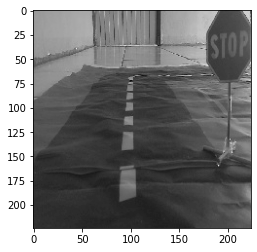

(224, 224)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

img = mpimg.imread('/content/greyscale.png')
print(img.shape)
gray = rgb2gray(img)

plt.imshow(gray, cmap = plt.get_cmap('gray'))

plt.savefig('lena_greyscale.png')
plt.show()
print(gray.shape)

In [ ]:
 
 

# Importing Image and ImageOps module from PIL package
from PIL import Image, ImageOps

# creating an og_image object
og_image = Image.open("/content/drive/MyDrive/dataset/test_dataset/1/02c4a090-3892-11eb-9b83-4c1d96ff1cde.jpg")

# applying grayscale method
gray_image = ImageOps.grayscale(og_image)
gray_image.save('gray_image.png')

 


In [ ]:
def imshow(image, ax=None, title=None):
    if ax is None:
        fig, ax = plt.subplots()
    
    # PyTorch tensors assume the color channel is the first dimension
    # but matplotlib assumes is the third dimension
    image = image.transpose((1, 2, 0))
    
    # Undo preprocessing
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean
    
    if title is not None:
        ax.set_title(title)
    
    # Image needs to be clipped between 0 and 1 or it looks like noise when displayed
    image = np.clip(image, 0, 1)
    
    ax.imshow(image)
    
    return ax


In [ ]:
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

img = "/content/drive/MyDrive/dataset/test/1/IMG_20201119_044604.jpg"
imagen = cv2.imread(img) # reads image
 
cv2_imshow(imagen)
print(imagen.shape)
img_gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

cv2_imshow(img_gris)
print(img_gris.shape)

In [ ]:
#Class Prediction
# Implement the code to predict the class from an image file

def predict(image_path, model, topk=5):
    ''' Predict the class (or classes) of an image using a trained deep learning model.
    '''
    #print(model)
    image = process_image(image_path)
    
    # Convert image to PyTorch tensor first
    image = torch.from_numpy(image).type(torch.cuda.FloatTensor)
    #print(image.shape)
    #print(type(image))
    
    # Returns a new tensor with a dimension of size one inserted at the specified position.
    image = image.unsqueeze(0)
    model.cuda()
    output = model.forward(image)
    
    probabilities = torch.exp(output)
    
    # Probabilities and the indices of those probabilities corresponding to the classes
    top_probabilities, top_indices = probabilities.topk(topk)
    
    # Convert to lists
    top_probabilities = top_probabilities.detach().type(torch.FloatTensor).numpy().tolist()[0] 
    top_indices = top_indices.detach().type(torch.FloatTensor).numpy().tolist()[0] 
    
    # Convert topk_indices to the actual class labels using class_to_idx
    # Invert the dictionary so you get a mapping from index to class.
    
    idx_to_class = {value: key for key, value in model.class_to_idx.items()}
    #print(idx_to_class)
    
    top_classes = [idx_to_class[index] for index in top_indices]
    
    return top_probabilities, top_classes
    
probs, classes = predict('/content/drive/MyDrive/dataset/test/1/IMG_20201119_044604.jpg', model)   
print(probs)
print(classes)

[[[-0.98767018 -0.54761905  0.84479303]
  [-0.98767018 -0.54761905  0.84479303]
  [-0.97054542 -0.53011204  0.86222222]
  ...
  [-1.46716328 -1.17787115 -0.14867102]
  [-1.45003853 -1.16036415 -0.14867102]
  [-1.43291378 -1.16036415 -0.14867102]]

 [[-1.00479493 -0.56512605  0.82736383]
  [-1.00479493 -0.56512605  0.84479303]
  [-0.98767018 -0.54761905  0.86222222]
  ...
  [-1.46716328 -1.17787115 -0.14867102]
  [-1.45003853 -1.17787115 -0.14867102]
  [-1.43291378 -1.16036415 -0.13124183]]

 [[-0.98767018 -0.56512605  0.79250545]
  [-0.98767018 -0.56512605  0.82736383]
  [-1.00479493 -0.56512605  0.82736383]
  ...
  [-1.43291378 -1.14285714 -0.11381264]
  [-1.43291378 -1.16036415 -0.14867102]
  [-1.43291378 -1.17787115 -0.14867102]]

 ...

 [[-1.34729001 -1.63305322 -1.45586057]
  [-1.33016525 -1.61554622 -1.42100218]
  [-1.33016525 -1.63305322 -1.43843137]
  ...
  [-1.72403459 -1.80812325 -1.61272331]
  [-1.72403459 -1.80812325 -1.61272331]
  [-1.70690984 -1.80812325 -1.61272331]]

 [

In [ ]:
imagePath='/content/drive/MyDrive/dataset/dataset_fotos_jetbot/1/19ada0ca-3894-11eb-9b83-4c1d96ff1cde.jpg'

image = process_image(imagePath)
imshow(image)
probs, classes = predict(imagePath, model)   
print(probs)
print(classes)

In [ ]:
 #Testing your network
def test_accuracy(model, test_loader):

    # Do validation on the test set
    model.eval()
    model.to('cuda')

    with torch.no_grad():
    
        accuracy = 0
    
        for images, labels in iter(test_loader):
    
            images, labels = images.to('cuda'), labels.to('cuda')
    
            output = model.forward(images)

            probabilities = torch.exp(output)
        
            equality = (labels.data == probabilities.max(dim=1)[1])
        
            accuracy += equality.type(torch.FloatTensor).mean()
        
        print("Test Accuracy: {}".format(accuracy/len(test_loader)))    
        
        
test_accuracy(model, test_loader)

Test Accuracy: 0.9375
